In [1]:
import streamlit as st
import pandas as pd
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

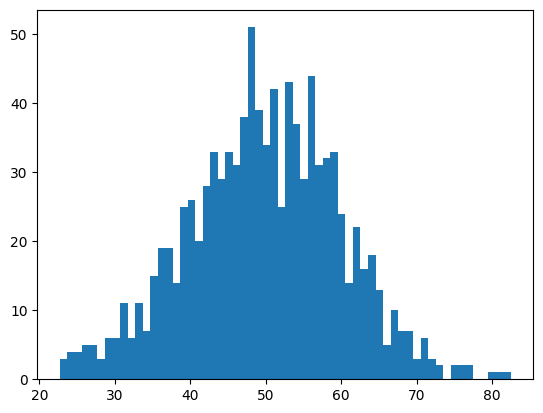

In [2]:
n = 1000
mu, sigma, bins = 50, 10, 60
score = [gauss(mu, sigma) for _ in range(n)]
df = pd.DataFrame({"score": score})
fig, ax = plt.subplots()
a,b,c = ax.hist(df, bins=bins)

In [4]:
########
#MSEシュミレーション(計算時間かかる)
mse_list = []
for bins in range(1,100):
    total = 0
    a,b,c = ax.hist(df, bins=bins, density=True)
    mediums = [(b[i]+b[i-1])/2 for i in range(1,len(b)) for _ in range(0,int(a[i-1]))]
    kansokutis = [a[i] for i in range(len(a)) for _ in range(int(a[i]))]
    for i in range(n):
        rironti = norm.pdf(mediums[i], mu, sigma)
        total += (kansokutis[i] - rironti)**2
    mse_list.append(total/n)


IndexError: list index out of range

2023-12-07 20:46:11.440 
  command:

    streamlit run C:\Users\kokie\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 1 Axes>

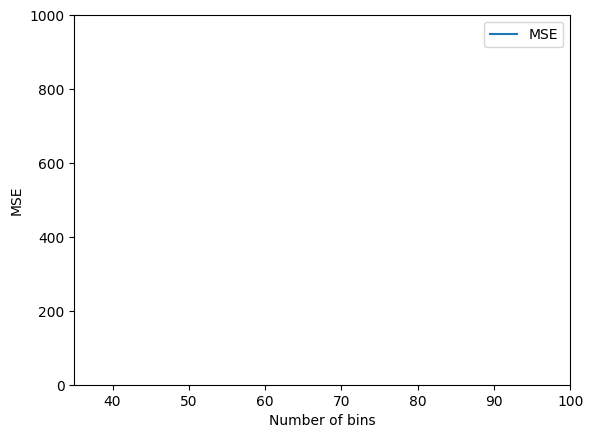

In [5]:
fig1, ax1 = plt.subplots()
df = pd.DataFrame({"MSE":mse_list})
ax1 = df.plot(ax=ax1)
ax1.set_xlim(1, 100)
#ax1.set_ylim(0,10000)
ax1.set_ylabel("MSE (Log Scale)")
ax1.set_yscale('log')


fig2, ax2 = plt.subplots()
ax2 = df.plot(ax=ax2)
ax2.set_xlim(35, 100)
ax2.set_ylim(0,1000)
ax2.set_xlabel("Number of bins")
ax2.set_ylabel("MSE")
st.pyplot(fig2)

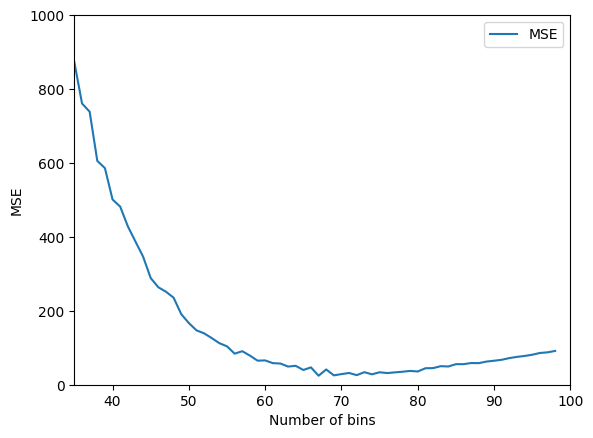

In [56]:
fig2

In [ ]:
fig1